### y = m * x + b

A minimal example of linear regression in TensorFlow 2.0, written from scratch without using any built-in layers, optimizers, or loss functions. We'll create a few points on a scatter plot, then find the best fit line using the equation `y = m * x + b`.

In [0]:
!pip install -q tensorflow==2.0.0-alpha0

In [0]:
import pylab
import tensorflow as tf

from tensorflow.keras import Model

Create a noisy dataset that's roughly linear, according to the equation y = m * x + b + noise.

In [0]:
def make_noisy_data(m=0.1, b=0.3, n=100):
  x = tf.random.uniform(shape=(n,))
  noise = tf.random.normal(shape=(len(x),), stddev=0.01)
  y = m * x + b + noise
  return x, y

In [0]:
x_train, y_train = make_noisy_data()
x_test, y_test = make_noisy_data()

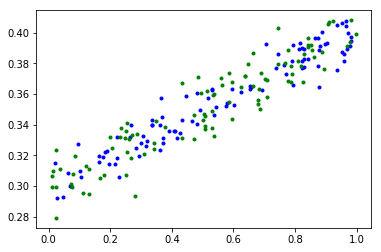

In [5]:
pylab.plot(x_train, y_train, 'b.')
pylab.plot(x_test, y_test, 'g.')

Define variables for our model. 

In [0]:
m = tf.Variable(0.)
b = tf.Variable(0.)

Predict y given x.

In [0]:
def predict(x):
  y = m * x + b
  return y

Our loss will be the squared difference between the predicted values and the true values.

In [0]:
def squared_error(y_pred, y_true):
  return tf.reduce_mean(tf.square(y_pred - y_true)) 

Calculate loss for the training data, before training.

In [9]:
loss = squared_error(predict(x_train), y_train)
print("Starting loss", loss.numpy())

Starting loss 0.12728466


Use gradient descent to gradually improve our guess for `m` and `b`. At each step, we'll nudge them a little bit in the right direction to reduce the loss.

In [10]:
learning_rate = 0.05
steps = 200

for i in range(steps):
  
  with tf.GradientTape() as tape:
    predictions = predict(x_train)
    loss = squared_error(predictions, y_train)
    
  gradients = tape.gradient(loss, [m, b])
  
  m.assign_sub(gradients[0] * learning_rate)
  b.assign_sub(gradients[1] * learning_rate)
  
  if i % 20 == 0:    
    print("Step %d, Loss %f" % (i, loss.numpy()))

Step 0, Loss 0.127285
Step 20, Loss 0.000721
Step 40, Loss 0.000244
Step 60, Loss 0.000203
Step 80, Loss 0.000173
Step 100, Loss 0.000150
Step 120, Loss 0.000133
Step 140, Loss 0.000119
Step 160, Loss 0.000108
Step 180, Loss 0.000100


The learned values for m and b.

In [11]:
print ("m: %f, b: %f" % (m.numpy(), b.numpy()))


m: 0.115868, b: 0.290819


Plot the best fit line.

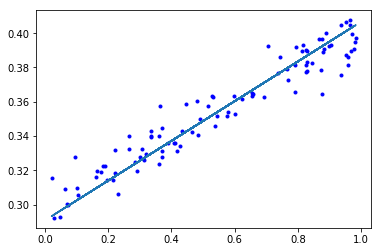

In [12]:
pylab.plot(x_train, y_train, 'b.')
pylab.plot(x_train, predict(x_train))

A couple things you can explore:

* To understand gradient descent, try printing out the `gradients` calculated below. See how they're used to adjust the variables (`m` and `b`).

* You can use TF 2.0 a lot like NumPy.  Try printing out the training data we created (`x_train`, `y_train`) and understand the format. Next, do the same for the variables (m and b). Notice both of these can be converted to NumPy format (with `.numpy()`).

* As a short exercise, see if you can print the loss and best fit line for the testing data.